In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [9]:
import pandas as pd
data_a = pd.read_csv('D:/_MLOPS_project/2nd Project/mlproject/artifact/test.csv')
data_b = pd.read_csv('D:/_MLOPS_project/2nd Project/mlproject/artifact/train.csv')

data_b.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [3]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
x = df.drop(columns=['math_score'], axis=1)

In [29]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [30]:
y = df['math_score']

In [31]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [32]:
print("gender category ",df['gender'].unique())
print("race_ethnicity category ",df['race_ethnicity'].unique())
print("parental_level_of_education category ",df['parental_level_of_education'].unique())
print("lunch category ",df['lunch'].unique())
print("test_preparation_course category ",df['test_preparation_course'].unique())

gender category  ['female' 'male']
race_ethnicity category  ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education category  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch category  ['standard' 'free/reduced']
test_preparation_course category  ['none' 'completed']


In [33]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)



In [34]:
X = preprocessor.fit_transform(x)

In [35]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((800, 19), (200, 19))

##### Evaluate Model

In [37]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true,predicted)
    return mae, rmse, r2_square

In [41]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge':Ridge(),
    'K-Nearest-Neighnor' : KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGBRegressor': XGBRegressor(),
    'CatBoostRegressor': CatBoostRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list =[]
r2_list = []

for i in range(len(list(models))):
    model =  list(models.values())[i]
    model.fit(x_train,y_train) # train model

    #make prediction
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae, model_train_rsme, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rsme, model_test_r2  = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for training set')
    print('rmse: ', model_train_rsme)
    print('mae',model_train_mae)
    print('r2_score',model_train_r2)

    print('-----------------------------------------------------')
    print('model performance for test set')
    print('rmse: ', model_test_rsme)
    print('mae',model_test_mae)
    print('r2_score',model_test_r2)
    r2_list.append(model_test_r2)

    print("==================================================================")
    print("==================================================================")
    print("==================================================================")
    print("==================================================================")

LinearRegression
model performance for training set
rmse:  5.340183842955456
mae 4.272265625
r2_score 0.8735068463594741
-----------------------------------------------------
model performance for test set
rmse:  5.421371554436202
mae 4.2253125
r2_score 0.8792164757750934
Lasso
model performance for training set
rmse:  6.593815587795566
mae 5.206302661246526
r2_score 0.8071462015863456
-----------------------------------------------------
model performance for test set
rmse:  6.519694535667419
mae 5.157881810347763
r2_score 0.8253197323627853
Ridge
model performance for training set
rmse:  5.323324922741654
mae 4.26498782372598
r2_score 0.8743042615212909
-----------------------------------------------------
model performance for test set
rmse:  5.3903870169356365
mae 4.211100688014259
r2_score 0.8805931485028738
K-Nearest-Neighnor
model performance for training set
rmse:  5.709062970400659
mae 4.5175
r2_score 0.8554279731066252
-----------------------------------------------------
mod

In [42]:
print(model_list)

['LinearRegression', 'Lasso', 'Ridge', 'K-Nearest-Neighnor', 'Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoostRegressor', 'AdaBoostRegressor']


In [43]:
r2_list

[0.8792164757750934,
 0.8253197323627853,
 0.8805931485028738,
 0.7834973847119895,
 0.749792881024943,
 0.8495550594928252,
 0.8277965653186071,
 0.8516318920747058,
 0.847881747925303]

In [44]:
for i in range(len(r2_list)):
    print(model_list[i],r2_list[i])

LinearRegression 0.8792164757750934
Lasso 0.8253197323627853
Ridge 0.8805931485028738
K-Nearest-Neighnor 0.7834973847119895
Decision Tree 0.749792881024943
Random Forest Regressor 0.8495550594928252
XGBRegressor 0.8277965653186071
CatBoostRegressor 0.8516318920747058
AdaBoostRegressor 0.847881747925303


In [46]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model_list','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,model_list,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.879216
7,CatBoostRegressor,0.851632
5,Random Forest Regressor,0.849555
8,AdaBoostRegressor,0.847882
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Nearest-Neighnor,0.783497
4,Decision Tree,0.749793


#### Linear Regression

In [47]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("accuracy od model is %.2f" %score)

accuracy od model is 87.92


### Plot y_pred and y_test

Text(0, 0.5, 'predicted')

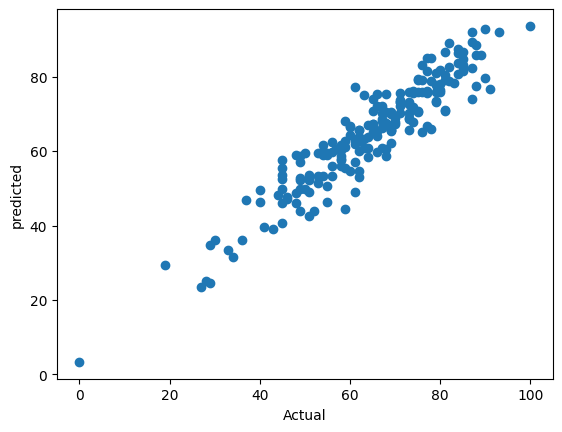

In [48]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')


<Axes: xlabel='math_score'>

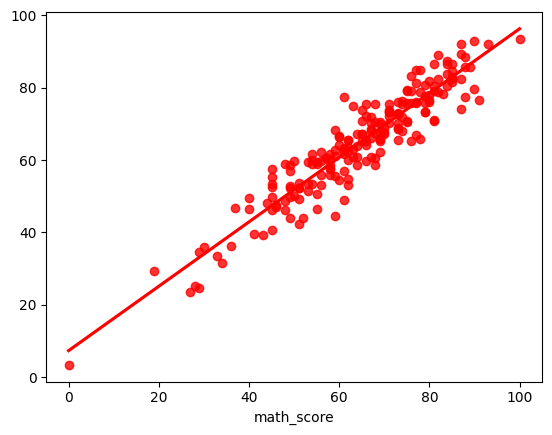

In [49]:
sns.regplot(x=y_test,y=y_pred, ci=None, color='red')

#### Diffirence between actual and predicted values

In [53]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted valaue':y_pred,'Diffirence':y_test-y_pred})
pred_df

,Actual Value,Predicted valaue,Diffirence
521,91,76.6250,14.3750
737,53,59.3750,-6.3750
740,80,76.5000,3.5000
660,74,76.2500,-2.2500
411,84,87.4375,-3.4375
...,...,...,...
408,52,43.8750,8.1250
332,62,62.6250,-0.6250
208,74,67.9375,6.0625
613,65,67.2500,-2.2500


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57
